In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [31]:
# creating path
path = r'C:\Users\nikik\achievement 6\Data\boat_data_cleaned.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year,Length,Width,Material,Location,Number of views,price_clean
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3337.0
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490.0
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3770.0
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64,25900.0
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399.0


# Cleaning data

In [5]:
df.dtypes

Price               object
Boat Type           object
Manufacturer        object
Type                object
Year                 int64
Length             float64
Width              float64
Material            object
Location            object
Number of views      int64
price_clean        float64
dtype: object

In [6]:
# Keep only numeric cols I want for clustering
df_kmeans = df[['Length', 'price_clean']].copy()

In [7]:
df_kmeans.head()

,Length,price_clean
0,4.00,3337.0
1,4.00,3490.0
2,3.69,3770.0
3,3.00,25900.0
4,3.55,3399.0


In [8]:
# checking mising values
df_kmeans.isnull().sum()

Length           0
price_clean    298
dtype: int64

In [9]:
#Drop missing values
df_kmeans = df_kmeans.dropna()

In [10]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)

In [11]:
print(type(df_kmeans), df_kmeans.shape)
print(type(X_scaled), X_scaled.shape)


<class 'pandas.core.frame.DataFrame'> (9590, 2)
<class 'numpy.ndarray'> (9590, 2)


# Elbow technique

In [12]:
inertia = []
num_cl = range(1, 11)

for k in num_cl:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

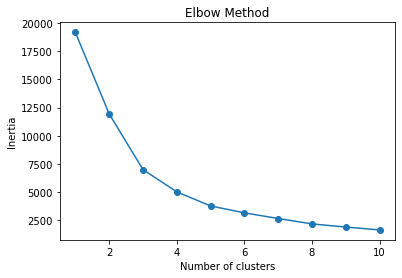

In [13]:
plt.plot(num_cl, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [14]:
# Initialize k-means with chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [15]:
# Fit the model to the standardized data
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [16]:
# Add cluster labels to the original dataframe
df_kmeans['cluster'] = kmeans.labels_

In [17]:
# Check how many observations are in each cluster
df_kmeans['cluster'].value_counts()

0    7981
1    1564
2      45
Name: cluster, dtype: int64

In [18]:
# Add cluster labels as a new column
df_kmeans['cluster'] = kmeans.labels_

In [19]:
# Preview the result
df_kmeans.head()

,Length,price_clean,cluster
0,4.00,3337.0,0
1,4.00,3490.0,0
2,3.69,3770.0,0
3,3.00,25900.0,0
4,3.55,3399.0,0


In [20]:
df_kmeans['cluster'].value_counts()

0    7981
1    1564
2      45
Name: cluster, dtype: int64

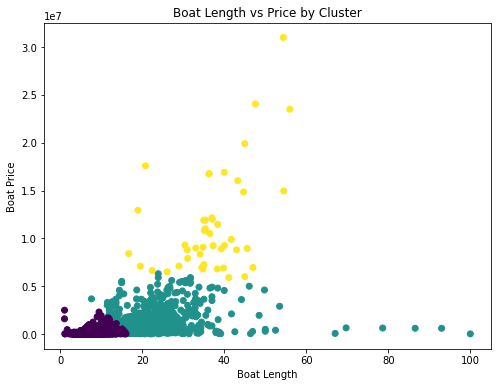

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_kmeans['Length'],
    df_kmeans['price_clean'],
    c=df_kmeans['cluster']
)

plt.xlabel('Boat Length')
plt.ylabel('Boat Price')
plt.title('Boat Length vs Price by Cluster')
plt.show()

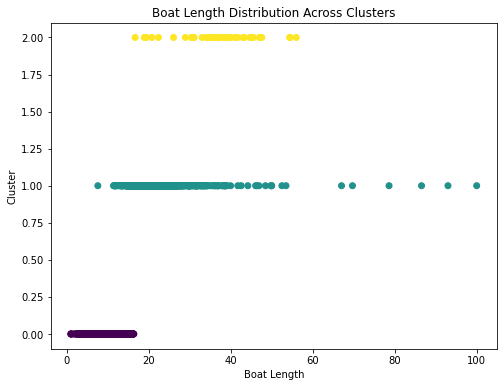

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_kmeans['Length'],
    df_kmeans['cluster'],
    c=df_kmeans['cluster']
)

plt.xlabel('Boat Length')
plt.ylabel('Cluster')
plt.title('Boat Length Distribution Across Clusters')
plt.show()

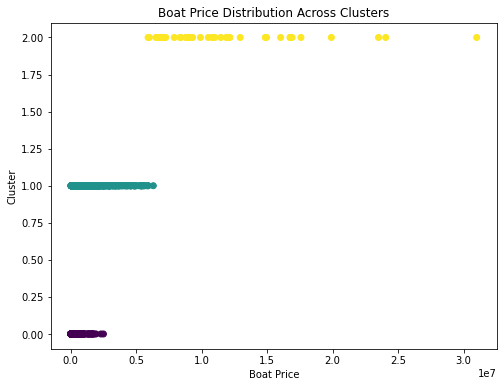

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_kmeans['price_clean'],
    df_kmeans['cluster'],
    c=df_kmeans['cluster']
)

plt.xlabel('Boat Price')
plt.ylabel('Cluster')
plt.title('Boat Price Distribution Across Clusters')
plt.show()

# Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
The clusters produced by the k-means algorithm appear to be meaningful and interpretable. They primarily separate boats based on a combination of boat length and price, which is a logical outcome given that larger boats typically require more materials, stronger engines, and additional features, resulting in higher prices.

One cluster groups shorter, lower-priced boats, likely representing entry-level or recreational vessels. Another cluster contains longer and more expensive boats, which may correspond to premium, professional, or luxury boat types. This indicates that the algorithm successfully identified natural groupings within the data based on key numerical characteristics.

Some overlap between clusters is visible, which is expected in real-world market data. Boats of similar length can still vary in price due to factors not included in this analysis, such as brand, material, engine type, or condition. This suggests that while the clusters make sense, incorporating additional numerical variables in future analyses could further improve cluster separation.

Overall, the clustering results provide useful insights into how boats can be segmented into distinct market categories based on size and price.

In [24]:
# Descriptive statistics by cluster
df_kmeans.groupby('cluster')[['Length', 'price_clean']].describe()

Length                                                           \
          count       mean       std    min   25%    50%      75%    max   
cluster                                                                    
0        7981.0   9.478932  2.992640   1.04   7.0   9.18  11.8100   16.4   
1        1564.0  20.910064  6.499766   7.62  17.0  19.50  22.9425  100.0   
2          45.0  36.854667  8.876201  16.71  34.1  36.50  41.7000   56.0   

        price_clean                                                    \
              count          mean           std        min        25%   
cluster                                                                 
0            7981.0  1.203013e+05  1.437648e+05     3300.0    37500.0   
1            1564.0  9.390241e+05  9.893716e+05     9850.0   349000.0   
2              45.0  1.141379e+07  5.405438e+06  5900000.0  7250000.0   

                                            
               50%         75%         max  
cluster                                     
0          72500.0    152265.0   2490000.0  
1         599000.0   1095125.0   6300000.0  
2        9250000.0  12937500.0  31000000.0

# Descriptive analysis interpretation
The descriptive statistics by cluster show a clear and meaningful segmentation of boats based on length and price.

Cluster 0 is the largest group and represents small to medium-sized boats. These boats have an average length of approximately 9.5 meters and a median price of around 72,500, indicating entry-level or recreational boats that dominate the dataset.

Cluster 1 consists of larger and more expensive boats, with an average length of about 21 meters and a median price close to 599,000. This cluster likely represents mid-range to premium boats, such as professional or high-performance vessels.

Cluster 2 is the smallest but most distinct group. Boats in this cluster are very large, with an average length of nearly 37 meters, and extremely high prices, with a median value above 9 million. This cluster clearly corresponds to luxury or superyachts.

The progressive increase in both length and price across clusters confirms that the k-means algorithm successfully captured meaningful market segments. While some variation exists within clusters, the overall pattern strongly supports the idea that boat size is a key driver of price, and that the clustering results reflect realistic industry categories.

# Useful for in future steps of an analytics pipeline.
The clustering results can serve as a valuable input for future steps in an analytics pipeline. By segmenting boats into distinct groups based on size and price, these clusters can be used to support market segmentation, pricing strategies, and targeted recommendations.

In future analyses, the cluster labels could be used as features in supervised machine learning models, such as classification or regression, to improve price prediction accuracy or to identify the likely category of a new boat listing. Additionally, businesses could use these clusters to tailor marketing strategies, for example by targeting luxury buyers separately from recreational or mid-range customers.

The clusters could also guide further exploratory analysis, such as examining differences in manufacturers, materials, or locations within each cluster. Overall, this segmentation provides a structured foundation for more advanced modeling, decision-making, and business intelligence applications.

In [37]:
# merging
df_with_clusters = df.merge(
    df_kmeans[['Length', 'price_clean', 'cluster']],
    on=['Length', 'price_clean'],
    how='left'
)

In [38]:
df_with_clusters.head()

,Price,Boat Type,Manufacturer,Type,Year,Length,Width,Material,Location,Number of views,price_clean,cluster
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3337.0,0.0
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490.0,0.0
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3770.0,0.0
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64,25900.0,0.0
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399.0,0.0


In [39]:
df_with_clusters.to_csv(
    r"C:\Users\nikik\achievement 6\Data\boat_data_cleaned_FINAL.csv",
    index=False
)